## Analyze the big dataset

total data: 588108
avg loc : 12.934027423534452
max loc : 2860

Level 1: 0.67
Level 2: 0.86
Level 3: 0.92
Level 4: 0.95
Level 5: 0.97
Level 6: 0.98
Level 7: 1.0


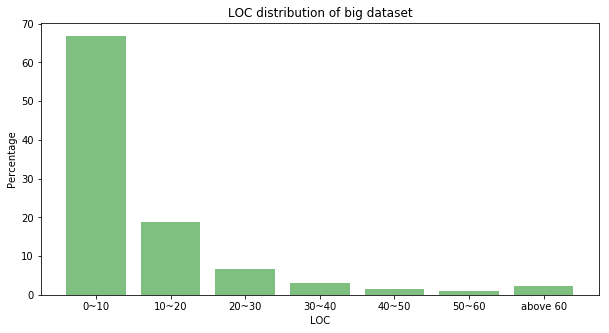

In [2]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

inputs = []
for path in ['../DeepCom_data/train.json', '../DeepCom_data/test.json', '../DeepCom_data/valid.json']:
    input_file = open(path)
    inputs.extend(input_file.readlines())
    input_file.close()

avgloc = 0
locLevel = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}  # loc level {0~10, 10~20, ..., 50~60, 60up}
maxloc = 0
maxkey = 0

print('total data: ' + str(len(inputs)))
for key, pair in enumerate(inputs):
    pair = json.loads(pair)
    loc = len(pair['code'].split('\n'))
    avgloc += loc
    if loc >= 60:
        locLevel['7'] += 1
    else:
        locLevel[str(math.ceil(loc/10))] += 1
    if loc > maxloc:
        maxloc = loc
        maxkey = key

avgloc = avgloc/len(inputs)

print('avg loc : '+str(avgloc))
print('max loc : '+str(maxloc),end='\n\n')


cnt = 0
percent_cnt = []
percent_cnt2 = []
for i in range(7):
    cnt += locLevel[str(i+1)]
    percent_cnt.append(round(cnt/len(inputs), 2))
    percent_cnt2.append((locLevel[str(i+1)]/len(inputs))*100)
    print('Level '+str(i+1)+': '+str(round(cnt/len(inputs), 2)))


objects = ('0~10', '10~20', '20~30', '30~40', '40~50', '50~60', 'above 60')
y_pos = np.arange(len(objects))

plt.figure(figsize=(10,5))
plt.bar(y_pos, percent_cnt2, color="g", align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('LOC')
plt.ylabel('Percentage')
plt.title('LOC distribution of big dataset')

plt.show()

## Plot the learning curve of the training process

In [ ]:
plt.plot(range(1, epoch+1), lossArray, "b")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title(MODE+" version model training loss")
plt.show()

plt.plot(range(1, epoch), testAccuracy, "r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title(MODE+" version model testing accuracy")
plt.show()

## Analyze our simplified dataset

total data: 12703
avg loc : 8.904274580807684
max loc : 40

Level 1: 0.73
Level 2: 0.92
Level 3: 0.98
Level 4: 1.0
{'1': 9307, '2': 2327, '3': 806, '4': 263}


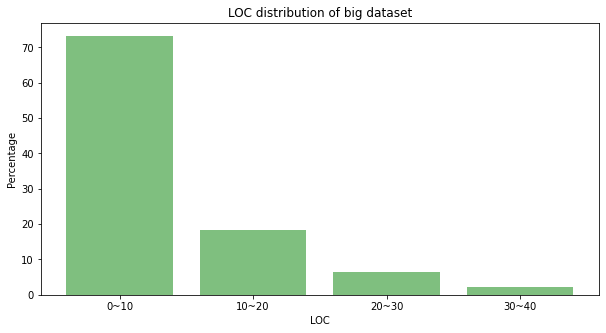

In [17]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

inputs = []
for path in ['../simplified_dataset/simplified_train.json', '../simplified_dataset/simplified_test.json']:
    input_file = open(path)
    inputs.extend(input_file.readlines())
    input_file.close()

avgloc = 0
locLevel = {'1':0, '2':0, '3':0, '4':0}  # loc level {0~10, 10~20, ..., 50~60, 60up}
maxloc = 0
maxkey = 0

print('total data: ' + str(len(inputs)))
for key, pair in enumerate(inputs):
    pair = json.loads(pair)
    loc = len(pair['code'].split('\n'))
    
    avgloc += loc
    if loc >= 40:
        locLevel['4'] += 1
    else:
        locLevel[str(math.ceil(loc/10))] += 1
    if loc > maxloc:
        maxloc = loc
        maxkey = key


avgloc = avgloc/len(inputs)

print('avg loc : '+str(avgloc))
print('max loc : '+str(maxloc),end='\n\n')


cnt = 0
percent_cnt = []
percent_cnt2 = []
for i in range(4):
    cnt += locLevel[str(i+1)]
    percent_cnt.append(round(cnt/len(inputs), 2))
    percent_cnt2.append((locLevel[str(i+1)]/len(inputs))*100)
    print('Level '+str(i+1)+': '+str(round(cnt/len(inputs), 2)))


objects = ('0~10', '10~20', '20~30', '30~40')
y_pos = np.arange(len(objects))

plt.figure(figsize=(10,5))
plt.bar(y_pos, percent_cnt2, color="g", align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('LOC')
plt.ylabel('Percentage')
plt.title('LOC distribution of big dataset')

plt.show()

In [300]:
percent_cnt2

[69.76449474993309, 20.80663696613825, 6.969129291752593, 2.4597389921760624]

In [25]:
(0.3926*9307+0.3076*2327+0.2636*806+0.2049*263)/12703

0.3649581752341966

In [301]:
locLevel

{'1': 88633, '2': 26434, '3': 8854, '4': 3125}

In [298]:
import json
import javalang

def code_tokenize(code):
    inputs = []
    tokens_parse = javalang.tokenizer.tokenize(code)
    for token in tokens_parse:
        token = str(token).split(' ')
        token[1] = token[1].strip('"')
        inputs.append(token[1])

    inputs.insert(0, '<START>')
    inputs.append('<END>')
    
    return inputs

def extractCode(inputs: list):
    code_voc = ['<PAD>','<START>','<END>','<UNK>']
    
    code_tokens = []
    for index, pair in enumerate(tqdm(inputs)):
        pair = json.loads(pair)
        parsed_inputs = code_tokenize(pair['code'])
        for token in parsed_inputs:
            if token not in code_voc:
                code_voc.append(token)
        code_tokens.append(parsed_inputs)
    
    return code_voc, code_tokens

input_file = open('../simplified_dataset/simplified_train.json')
inputs = input_file.readlines()
code_voc, code_tokens = extractCode(inputs)
len(code_voc)

100%|██████████| 114343/114343 [42:47<00:00, 44.53it/s] 


265955